In [4]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [50]:
def get_history(ticker, start, end, interval="1d", window_size=20, tries=0):
    try:
        df = yf.Ticker(ticker).history(start=start,
                                       end=end,
                                       interval=interval,
                                       auto_adjust=True
                                       ).reset_index()
    except Exception as err:
        if tries < 5:
            return get_history(ticker, start, end, interval, tries+1)
        return pd.DataFrame()
    try:
        df = df.rename(columns={
            "Date": "datetime",
            "Open": "open",
            "High": "high",
            "Low": "low",
            "Close": "close",
            "Volume": "volume"
        })
        df = df.drop(columns=["Dividends", "Stock Splits"])
    except:
        pass
    if df.empty:
        return pd.DataFrame()
    df = df.set_index("datetime", drop=True)
    df["annual_vol"] = (df["close"].pct_change().rolling(window=window_size).std().fillna(0)*np.sqrt(252))*100
    return pd.DataFrame(df)


def moving_average(df, w=200):
    return df.rolling(window=w).mean()


In [67]:
ticker_index_a = "SPY"
ticker_index_b = "QQQ"

per_start = datetime(2016, 1, 1)
per_stop = datetime.now()

ndx = get_history(ticker=ticker_index_b, start=per_start, end=per_stop, interval="1d", tries=0)
spx = get_history(ticker=ticker_index_a, start=per_start, end=per_stop, interval="1d", tries=0)

In [64]:
print(ndx["annual_vol"])

datetime
2020-10-13 00:00:00-04:00     0.000000
2020-10-14 00:00:00-04:00     0.000000
2020-10-15 00:00:00-04:00     0.000000
2020-10-16 00:00:00-04:00     0.000000
2020-10-19 00:00:00-04:00     0.000000
                               ...    
2024-01-08 00:00:00-05:00    14.554834
2024-01-09 00:00:00-05:00    14.530770
2024-01-10 00:00:00-05:00    14.438217
2024-01-11 00:00:00-05:00    14.242816
2024-01-12 00:00:00-05:00    13.645291
Name: annual_vol, Length: 818, dtype: float64


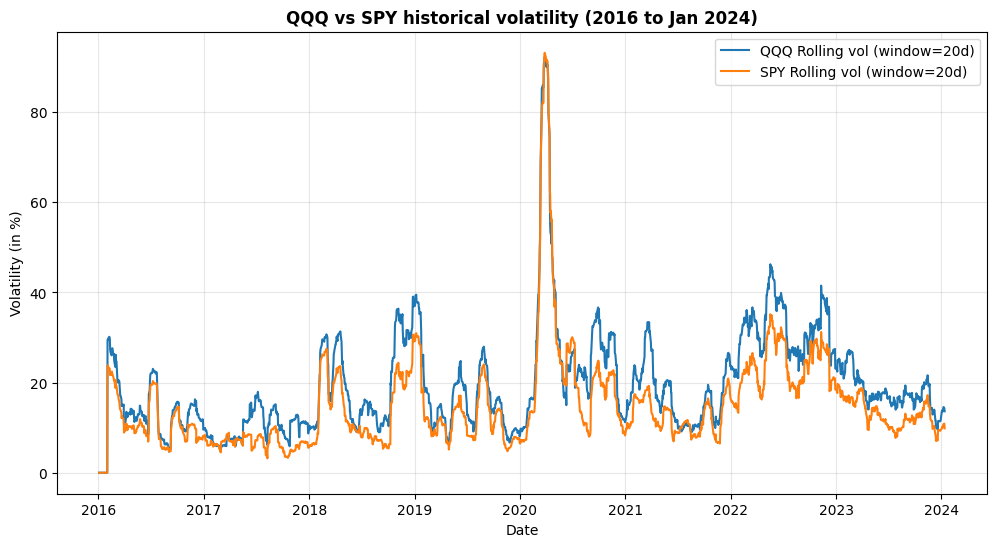

In [73]:
plt.figure(figsize=(12, 6))

plt.plot(ndx["annual_vol"], label=f"{ticker_index_b} Rolling vol (window=20d)")
plt.plot(spx["annual_vol"], label=f"{ticker_index_a} Rolling vol (window=20d)")
plt.grid(alpha=0.3)
plt.legend()
plt.ylabel("Volatility (in %)")
plt.xlabel("Date")
plt.title("QQQ vs SPY historical volatility (2016 to Jan 2024)", fontweight="bold")
plt.show()

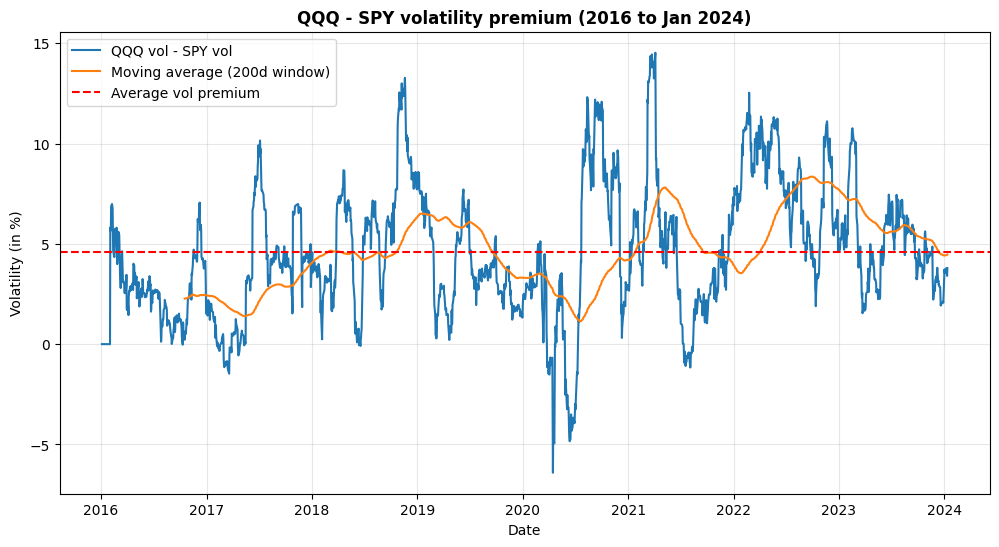

In [75]:
rv = ndx["annual_vol"] - spx["annual_vol"]

plt.figure(figsize=(12, 6))
plt.plot(rv, label=f"{ticker_index_b} vol - {ticker_index_a} vol")
plt.plot(moving_average(rv), label="Moving average (200d window)")
plt.axhline(np.average(rv), label="Average vol premium", color="red", linestyle="--")
plt.grid(alpha=0.3)
plt.legend()
plt.ylabel("Volatility (in %)")
plt.xlabel("Date")
plt.title("QQQ - SPY volatility premium (2016 to Jan 2024)", fontweight="bold")
plt.show()